In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv('..\preprocessed.csv')
pd.set_option("display.max_columns", None)
df

,Time,TempC,TempF,WindSpeedMiles,WindSpeedKmph,WindDirDegree,WindDir16Point,WeatherDesc,PrecipMM,PrecipInches,Humidity,VisibilityKm,VisibilityMiles,PressureMB,PressureInches,CloudCover,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,Date_Month
0,0,20.0,68.0,3,5.0,37.0,11,0,0.0,0.0,47,10,6,1015,30,0.0,20,68,12,54,20.0,68.0,6,10.0,20,68,1
1,100,19.0,67.0,3,4.0,36.0,11,0,0.0,0.0,48,10,6,1015,30,0.0,19,67,12,54,19.0,67.0,8,13.0,19,67,1
2,200,19.0,66.0,2,4.0,35.0,11,0,0.0,0.0,48,10,6,1015,30,0.0,19,66,12,54,19.0,66.0,8,13.0,19,66,1
3,300,18.5,65.0,2,4.0,34.0,6,0,0.0,0.0,48,10,6,1014,30,0.0,18,66,12,53,18.5,65.0,8,13.0,18,66,1
4,400,18.5,65.0,2,4.0,35.0,11,0,0.0,0.0,49,10,6,1015,30,1.0,18,66,12,53,18.5,65.0,8,12.0,18,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,1900,26.0,79.0,4,7.0,303.0,2,0,0.0,0.0,45,10,6,1011,30,0.0,27,80,13,56,26.0,79.0,8,13.0,27,80,12
8785,2000,25.0,78.0,3,4.0,333.0,0,0,0.0,0.0,46,10,6,1012,30,0.0,26,79,13,55,25.0,78.0,5,9.0,26,79,12
8786,2100,25.0,77.0,2,4.0,19.0,6,0,0.0,0.0,47,10,6,1012,30,1.0,26,78,13,55,25.0,77.0,5,7.0,26,78,12
8787,2200,24.0,76.0,2,4.0,41.0,11,0,0.0,0.0,47,10,6,1012,30,2.0,25,78,12,54,24.0,76.0,5,8.0,25,78,12


In [3]:
X=df.drop(['TempF','FeelsLikeF','WindChillF','VisibilityKm','VisibilityMiles','HeatIndexF','WeatherDesc','DewPointF','WindGustMiles','WindSpeedMiles'],axis=1)
y=df['VisibilityKm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [4]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 0.5967007963594995
Mean Absolute Percentage Error (MAPE): 2.4032540585441606


Feature Importance:
           Feature  Importance
7         Humidity    0.234221
6     PrecipInches    0.173165
0             Time    0.107098
3    WindDirDegree    0.104278
14    WindGustKmph    0.089010
10      CloudCover    0.058518
2    WindSpeedKmph    0.051495
16      Date_Month    0.040705
8       PressureMB    0.036778
11      HeatIndexC    0.032954
4   WindDir16Point    0.030906
13      WindChillC    0.013754
15      FeelsLikeC    0.007712
1            TempC    0.007442
5         PrecipMM    0.007107
12       DewPointC    0.004856
9   PressureInches    0.000000


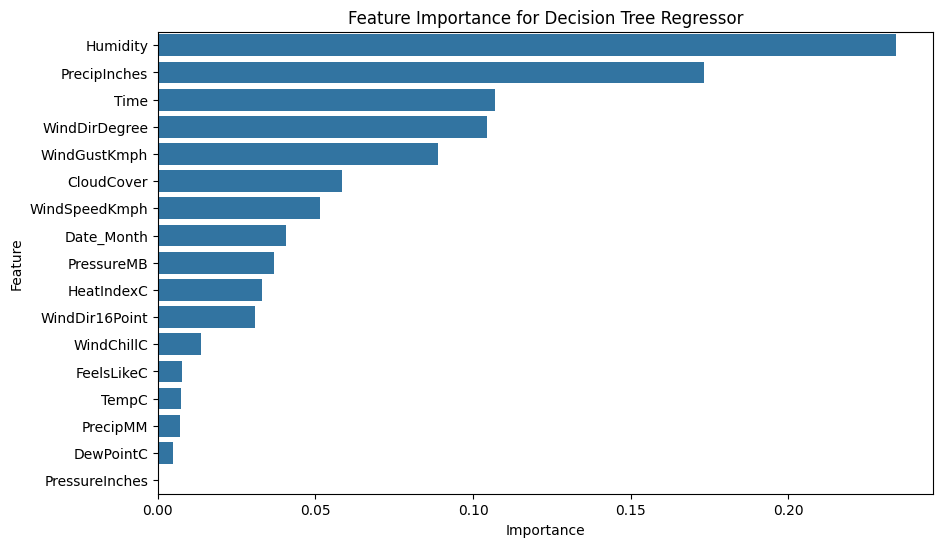

In [5]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Permutation Importance:
           Feature  Importance
7         Humidity    0.234221
6     PrecipInches    0.173165
0             Time    0.107098
3    WindDirDegree    0.104278
14    WindGustKmph    0.089010
10      CloudCover    0.058518
2    WindSpeedKmph    0.051495
16      Date_Month    0.040705
8       PressureMB    0.036778
11      HeatIndexC    0.032954
4   WindDir16Point    0.030906
13      WindChillC    0.013754
15      FeelsLikeC    0.007712
1            TempC    0.007442
5         PrecipMM    0.007107
12       DewPointC    0.004856
9   PressureInches    0.000000


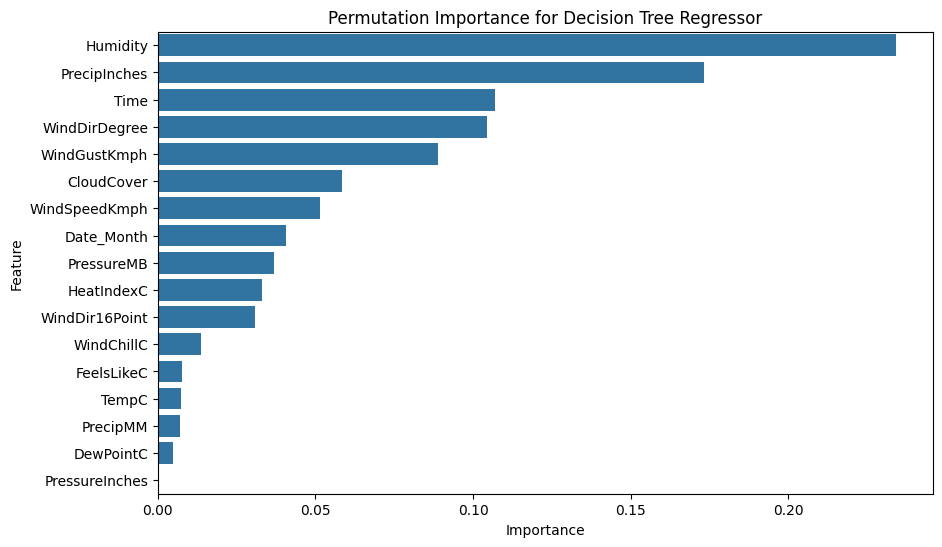

In [6]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

permutation_importances = perm_importance.importances_mean

print("Permutation Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Permutation Importance for Decision Tree Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


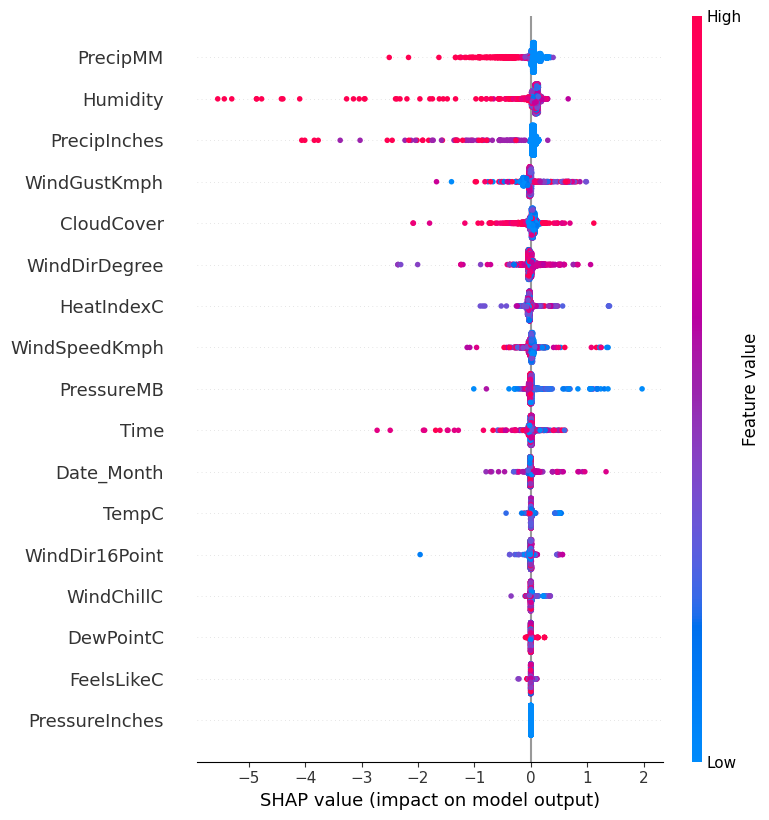

In [7]:
import shap 

explainer = shap.Explainer(model, X_train)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)